# Vehicle Type Classification Using SVM


In [2]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
#dataset
np.random.seed(42)
n_samples = 500
data = pd.DataFrame({
    'weight': np.random.normal(1500, 300, n_samples),          # in kg
    'engine_size': np.random.normal(2.0, 0.5, n_samples),      # in liters
    'num_wheels': np.random.choice([4, 6, 8], n_samples, p=[0.7, 0.2, 0.1]),
    'ground_clearance': np.random.normal(20, 5, n_samples),    # in cm
    'fuel_efficiency': np.random.normal(15, 3, n_samples)      # in km/l
})


In [6]:
data

,weight,engine_size,num_wheels,ground_clearance,fuel_efficiency
0,1649.014246,2.463089,4,18.173392,14.734911
1,1458.520710,2.954708,4,20.923402,13.889967
2,1694.306561,1.300716,4,13.264369,14.223612
3,1956.908957,2.281485,6,15.141930,19.795942
4,1429.753988,1.674679,4,26.002070,16.682758
...,...,...,...,...,...
495,1661.673013,1.859450,6,19.927739,18.105748
496,1188.826154,2.898843,4,22.731421,9.461436
497,1442.898397,2.320421,4,20.032111,12.211467
498,1237.314524,1.714411,4,17.818071,10.510412


In [13]:
# tagret Label
data['vehicle_type'] = (
    (data['weight'] > 1700) |
    (data['engine_size'] > 2.5) |
    (data['num_wheels'] > 4) |
    (data['ground_clearance'] > 25) |
    (data['fuel_efficiency'] < 13)
).astype(int)

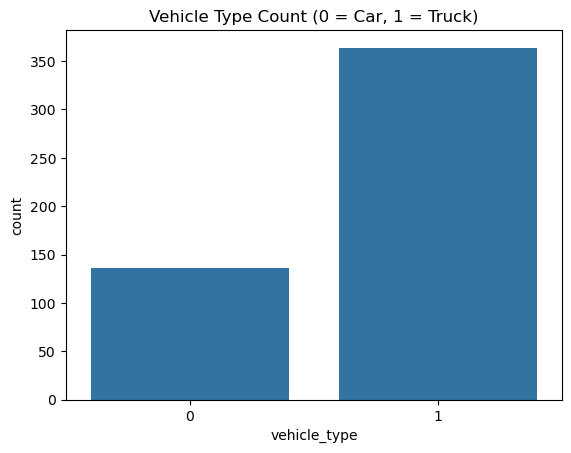

In [15]:
sns.countplot(x='vehicle_type', data=data)
plt.title("Vehicle Type Count (0 = Car, 1 = Truck)")
plt.show()


In [17]:
X = data.drop('vehicle_type', axis=1)
y = data['vehicle_type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)



SVC()

In [23]:
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[20  6]
 [ 4 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.92      0.95      0.93        74

    accuracy                           0.90       100
   macro avg       0.88      0.86      0.87       100
weighted avg       0.90      0.90      0.90       100

